Working with notebooks
==================

In [1]:
from pathlib import Path 

root_dir = Path("D:/mzb-workflow")
data_dir = Path(root_dir, "/data/mzb_example_data/raw_img/")
print(root_dir)
print(data_dir)

D:\mzb-workflow
D:\data\mzb_example_data\raw_img


In [2]:
import argparse
import sys
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import yaml
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import feature, measure, morphology, segmentation

import matplotlib.pyplot as plt
import matplotlib.colors as colors


# ROOT = "/data/shared/mzb-workflow/"
sys.path.append(f"{root_dir}")
from mzbsuite.skeletons.mzb_skeletons_helpers import paint_image


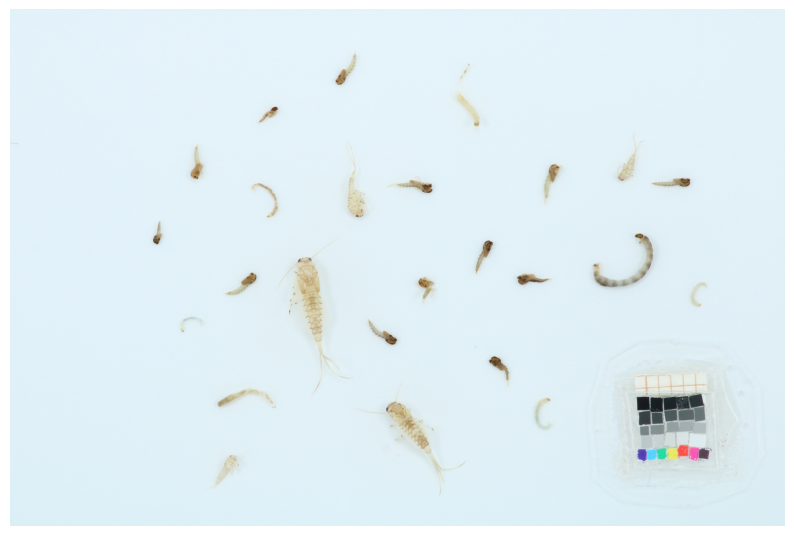

In [3]:
# blb = cv2.imread(f'{ROOT}data/learning_sets/project_portable_flume/skeletonization/images/31_b1_heptagenidae_01_clip_15_rgb.png') 
fma = cv2.imread(f'{root_dir}/data/mzb_example_data/raw_img/1_UR_mixed_01.JPG')
fma = cv2.cvtColor(fma, cv2.COLOR_BGR2RGB)
# fma = np.transpose(fma,(1,0,2))[::-1,:,:]

plt.figure(figsize=(10,10))
plt.imshow(fma)
plt.axis("off"); 

In [24]:
rr = measure.regionprops(fma)
area = [[rr.label, rr.area, rr.centroid] for rr in rr]
# area = [[rr.index, rr.area] for rr in rr]
# area = sorted(area, key=lambda x: x[1], reverse=True)
# area = np.array(area)
# area = area[0,:]

# area = area[area[1]>7500]

print(area[0])

[1, 1.0, (1345.0, 5224.0, 2.0)]


In [32]:
clean_mask = np.zeros_like(fma)
for i, (ind, ar, _) in enumerate(area):
    if ar > 7500:
        clean_mask[morphology.dilation(fma == ind, np.ones((3,3)))] = i+1
# regions = i
plt.figure(figsize=(10,10))
plt.imshow(clean_mask)

# print(regions)

IndexError: tuple index out of range

In [5]:
import matplotlib.colors

cmap = plt.cm.jet(np.linspace(0,1,regions))
# cmaplist = [cmap(i) for i in len(cmap)]
cmap[0] = (1.0,1.0,1.0,1.0)
comap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm', cmap, regions)

f, a = plt.subplots(1,1,figsize=(10,10)) 
a.imshow(clean_mask, cmap=comap)
a.axis("off")

for i, (ind, are, coo) in enumerate(area):
    if are > 7500:
        if ind != 0:
            a.text(np.mean(coo[1]), np.mean(coo[0]), f"{ind}", color="black", fontsize=12)
        # clean_mask[fma[:,:,0] == ind] = i+1

NameError: name 'regions' is not defined

In [6]:
area

[[1, 1.0, (1345.0, 5224.0, 2.0)],
 [3, 6.0, (2897.3333333333335, 4640.833333333333, 0.6666666666666666)],
 [4, 3.0, (2455.3333333333335, 4303.0, 1.3333333333333333)],
 [5, 4.0, (2813.75, 5054.5, 0.5)],
 [6, 6.0, (2811.1666666666665, 4023.6666666666665, 1.3333333333333333)],
 [7, 7.0, (2653.5714285714284, 4393.0, 1.1428571428571428)],
 [8, 9.0, (3122.8888888888887, 4539.666666666667, 0.4444444444444444)],
 [9, 14.0, (2686.714285714286, 4674.5, 0.8571428571428571)],
 [10, 19.0, (2577.2631578947367, 4473.736842105263, 1.1578947368421053)],
 [11, 29.0, (2565.448275862069, 4365.3448275862065, 1.0344827586206897)],
 [12, 44.0, (2662.159090909091, 4522.409090909091, 0.9090909090909091)],
 [13, 43.0, (2572.953488372093, 4563.139534883721, 1.0465116279069768)],
 [14, 59.0, (2629.4576271186443, 4563.677966101695, 1.0338983050847457)],
 [15, 61.0, (2590.44262295082, 4432.459016393443, 1.0655737704918034)],
 [16, 87.0, (2563.4942528735633, 4486.16091954023, 0.9655172413793104)],
 [17, 98.0, (2486.

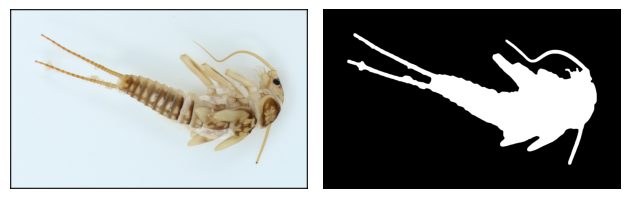

In [11]:
# blb = cv2.imread(f'{ROOT}data/learning_sets/project_portable_flume/skeletonization/images/31_b1_heptagenidae_01_clip_15_rgb.png') 
blb = cv2.imread(f'{root_dir}/data/mzb_example_data/derived/blobs/1_b1_mixed_02_1_rgb.jpg')
blb = cv2.cvtColor(blb, cv2.COLOR_BGR2RGB)
blb = np.transpose(blb,(1,0,2))[::-1,:,:]
blb[:,1:10] = 0; blb[:,-10:-1] = 0; blb[1:10,:] = 0; blb[-10:-1,:] = 0

msk = cv2.imread(f'{root_dir}/data/mzb_example_data/derived/blobs/1_b1_mixed_02_1_mask.jpg')
msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
msk = np.transpose(msk,(1,0))[::-1,:]

f, a = plt.subplots(1,2)
a[0].imshow(blb)
a[0].axis("off")
a[1].imshow(msk, cmap="gray")
a[1].axis("off")
f.tight_layout()

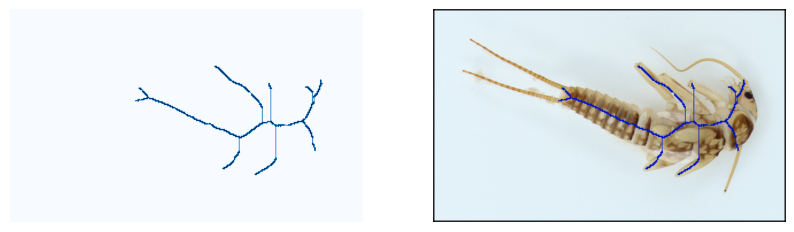

In [12]:
# read the skeleton image and convert to grayscale 
msk_a = cv2.imread(f'{root_dir}/data/mzb_example_data/derived/skeletons/unsupervised_skeletons/1_b1_mixed_02_1_mask_skel.jpg')
msk_a = cv2.cvtColor(msk_a, cv2.COLOR_BGR2RGB)[:,:,0] > 0
msk_a = np.transpose(msk_a,(1,0))[::-1,:]

# replace values with growing index
val_to_replace = np.unique(msk_a)[1:]
for i,v in enumerate(val_to_replace):
    msk_a[msk_a==v] = i+1

msk_a = morphology.thin(msk_a) #, morphology.disk(2)).astype(int)
msk_a = morphology.dilation(msk_a, morphology.disk(2)).astype(int)
# msk_a[msk_a > 0] += 50

# overlay red skeleton on blob
mm_merged_autom = paint_image(blb, msk_a, color=[0,20,200])

f, a = plt.subplots(1,2, figsize=(10,10))
a[0].imshow(msk_a, cmap="Blues") #, cmap=cmap, norm=norm)
a[0].axis("off"); 
a[1].imshow(mm_merged_autom) #, cmap=cmap, norm=norm)
a[1].axis("off"); 

In [16]:
print(mm_merged_autom.shape)

(1484, 2458, 3)


In [37]:
# read the skeleton image and convert to grayscale 
msk_b = cv2.imread(f'{root_dir}/data/mzb_example_data/derived/skeletons/supervised_skeletons/1_b1_mixed_02_1_body.jpg')
msk_b = cv2.cvtColor(msk_b, cv2.COLOR_BGR2RGB)[:,:,0] > 0
msk_h = cv2.imread(f'{root_dir}/data/mzb_example_data/derived/skeletons/supervised_skeletons/1_b1_mixed_02_1_head.jpg')
msk_h = cv2.cvtColor(msk_h, cv2.COLOR_BGR2RGB)[:,:,0] > 0

msk_b = morphology.thin(msk_b) #, morphology.disk(2)).astype(int)
msk_b = morphology.dilation(msk_b, morphology.disk(2)).astype(int)
msk_h = morphology.thin(msk_h) #, morphology.disk(2)).astype(int)
msk_h = morphology.dilation(msk_h, morphology.disk(2)).astype(int)

# overlay red skeleton on blob
mm_merge = paint_image(blb, msk_b[:-1,:-1], color=[0,20,200])
mm_merge = paint_image(mm_merge, msk_h[:-1,:-1], color=[0,20,200])

f, a = plt.subplots(1,2, figsize=(10,10))
a[0].imshow(50 + (msk_h[:-1,:-1] | msk_b[:-1,:-1]).astype(int), cmap="Blues") #, cmap=cmap, norm=norm)
a[0].axis("off"); 
a[1].imshow(mm_merge) #, cmap=cmap, norm=norm)
a[1].axis("off"); 



IndexError: boolean index did not match indexed array along dimension 0; dimension is 1484 but corresponding boolean dimension is 2457